In [1]:
import numpy as np
import pandas as pd
import sys, os, time
main_folder = './../'
if main_folder not in sys.path:
    sys.path.append(main_folder)
from evolution import DifferentialEvolution
from glob       import glob
from tqdm       import tqdm

import dirs
from utils      import get_solution, ProgressBar, write_log
import matplotlib.pyplot as plt 

progbar = ProgressBar(elapsed_time=True)

### Parameters

In [2]:
# Competition Parameters
funcId      = 1
dim         = 10
numRuns     = 2
targetError = 1e-8

# Algorithm Parameters
pop_size = 300
percMaxEvals = 1
maxEvals = 'auto'
maxGenerations = None
fitness_clusters = None
crossover = 'binonial'
mutation = 'best'
n_diff = 1
lambda_mutation = .5
opposition = False
input_data_filepath = './../input_data'
active = False

In [3]:
# Parameters
algorithm = "de"
mutation = "best"
n_diff = 1
crossover = "bin"
funcId = 6
dim = 30
numRuns = 51
pop_size = 300
percMaxEvals = 0.7
lambda_mutation = 0.5
opposition = False
fitness_clusters = None
input_data_filepath = "./input_data"
active = True


In [4]:
maxEvals = maxEvals if percMaxEvals is None else percMaxEvals*10000*dim
run_tag = '[' + '_'.join([str(funcId), 
                          str(dim), 
                          str(numRuns),
                          str(pop_size), 
                          str(percMaxEvals),                                                     
                          '{}'.format(lambda_mutation), 
                          str(opposition),
                          str(fitness_clusters)
                         ])  + ']'
run_tag

'[6_30_51_300_0.7_0.5_False_None]'

In [5]:
alg = DifferentialEvolution(dim=dim, func_id=funcId, pop_size=pop_size, crossover=crossover, 
        opposition=opposition, mutation=mutation, lambda_mutation=.5, fitness_clusters=fitness_clusters)

output_filepath = os.path.join(dirs.results, str(alg))
if not os.path.exists(output_filepath):
    os.makedirs(output_filepath)
output_filepath = output_filepath + '/' + run_tag

print ('Writing log at ', output_filepath + 'log.tsv')
write_log(filepath=output_filepath + 'log.tsv', 
          mode="w+", 
          text='[{}]\trun\telapsedTime\tsuccessRate\n'.format(time.strftime("%Y-%m-%d %H:%M:%S", time.gmtime())))  

Writing log at 

./results/DE/best/1/bin/[6_30_51_300_0.7_0.5_False_None]log.tsv

In [6]:
hist = pd.DataFrame()
arr_runs = range(numRuns)
solution = get_solution(funcId, dim, input_data_filepath=input_data_filepath)
successRate = 0
for idx_run in arr_runs:
    progbar.update_progress(idx_run/float(len(arr_runs)))
    
    # Differential Evolution
    alg = DifferentialEvolution(dim=dim, func_id=funcId, pop_size=pop_size, crossover=crossover, 
        opposition=opposition, mutation=mutation, lambda_mutation=.5, fitness_clusters=fitness_clusters)
    
    errorHist, fitnessHist = alg.optimize(target=solution, max_f_evals=maxEvals, target_error=targetError, verbose=True)        
    bestError = errorHist.iloc[-1,:].min()
    errorHist["run"] = np.ones(errorHist.shape[0], dtype=int)*idx_run
    hist = pd.concat([hist, errorHist], ignore_index=False)    
    if bestError <= targetError:
        print ("Target error achieved with error {}".format(bestError))
        successRate += 1
    
    write_log(filepath=output_filepath + 'log.tsv', 
              text='[{}]\t{}/{}\t{}\t{}\n'.format(time.strftime("%Y-%m-%d %H:%M:%S", time.gmtime()), 
                                              idx_run+1,
                                              len(arr_runs),
                                              progbar.get_elapsed_time(),
                                              successRate)
             )
    
hist.index.name = 'generation'
hist.to_csv(output_filepath + 'hist.tsv', sep='\t')
progbar.update_progress(1)

[0:00:00][----------] 0.00% 

Optimization ended due to max fitness evals (max = 210000.0, curr = 209400)


#Generations:	696

#FitnessEvals:	209400

Mean Fitness:	623.2662

Best Fitness:	618.3062
Solution:	600.0000
Diff:		18.3062

[0:28:21][----------] 1.96% 

Optimization ended due to max fitness evals (max = 210000.0, curr = 209400)


#Generations:	696

#FitnessEvals:	209400

Mean Fitness:	610.0880

Best Fitness:	608.2765
Solution:	600.0000
Diff:		8.2765

[0:54:57][----------] 3.92% 

Optimization ended due to max fitness evals (max = 210000.0, curr = 209400)


#Generations:	696

#FitnessEvals:	209400

Mean Fitness:	615.4708

Best Fitness:	613.0414
Solution:	600.0000
Diff:		13.0414

[1:21:22][#---------] 5.88% 

Optimization ended due to max fitness evals (max = 210000.0, curr = 209400)


#Generations:	696

#FitnessEvals:	209400

Mean Fitness:	606.6858

Best Fitness:	605.2471
Solution:	600.0000
Diff:		5.2471

[1:47:39][#---------] 7.84% 

Optimization ended due to max fitness evals (max = 210000.0, curr = 209400)


#Generations:	696

#FitnessEvals:	209400

Mean Fitness:	626.7273

Best Fitness:	622.1029
Solution:	600.0000
Diff:		22.1029

[2:13:49][#---------] 9.80% 

Optimization ended due to max fitness evals (max = 210000.0, curr = 209400)


#Generations:	696

#FitnessEvals:	209400

Mean Fitness:	607.5120

Best Fitness:	605.9230
Solution:	600.0000
Diff:		5.9230

[2:40:08][#---------] 11.76% 

Optimization ended due to max fitness evals (max = 210000.0, curr = 209400)


#Generations:	696

#FitnessEvals:	209400

Mean Fitness:	609.5973

Best Fitness:	607.6603
Solution:	600.0000
Diff:		7.6603

[3:04:35][#---------] 13.73% 

Optimization ended due to max fitness evals (max = 210000.0, curr = 209400)


#Generations:	696

#FitnessEvals:	209400

Mean Fitness:	609.7390

Best Fitness:	608.3884
Solution:	600.0000
Diff:		8.3884

[3:28:00][##--------] 15.69% 

Optimization ended due to max fitness evals (max = 210000.0, curr = 209400)


#Generations:	696

#FitnessEvals:	209400

Mean Fitness:	618.0569

Best Fitness:	613.8129
Solution:	600.0000
Diff:		13.8129

[3:51:17][##--------] 17.65% 

Optimization ended due to max fitness evals (max = 210000.0, curr = 209400)


#Generations:	696

#FitnessEvals:	209400

Mean Fitness:	616.6792

Best Fitness:	613.4594
Solution:	600.0000
Diff:		13.4594

[4:14:50][##--------] 19.61% 

Optimization ended due to max fitness evals (max = 210000.0, curr = 209400)


#Generations:	696

#FitnessEvals:	209400

Mean Fitness:	608.2858

Best Fitness:	606.5362
Solution:	600.0000
Diff:		6.5362

[4:38:01][##--------] 21.57% 

Optimization ended due to max fitness evals (max = 210000.0, curr = 209400)


#Generations:	696

#FitnessEvals:	209400

Mean Fitness:	609.1303

Best Fitness:	607.1932
Solution:	600.0000
Diff:		7.1932

[5:01:36][##--------] 23.53% 

Optimization ended due to max fitness evals (max = 210000.0, curr = 209400)


#Generations:	696

#FitnessEvals:	209400

Mean Fitness:	614.7802

Best Fitness:	611.9101
Solution:	600.0000
Diff:		11.9101

[5:25:23][###-------] 25.49% 

Optimization ended due to max fitness evals (max = 210000.0, curr = 209400)


#Generations:	696

#FitnessEvals:	209400

Mean Fitness:	611.8594

Best Fitness:	609.3546
Solution:	600.0000
Diff:		9.3546

[5:47:24][###-------] 27.45% 

Optimization ended due to max fitness evals (max = 210000.0, curr = 209400)


#Generations:	696

#FitnessEvals:	209400

Mean Fitness:	622.7352

Best Fitness:	618.5568
Solution:	600.0000
Diff:		18.5568

[6:07:39][###-------] 29.41% 

Optimization ended due to max fitness evals (max = 210000.0, curr = 209400)


#Generations:	696

#FitnessEvals:	209400

Mean Fitness:	611.3110

Best Fitness:	609.2498
Solution:	600.0000
Diff:		9.2498

[6:28:11][###-------] 31.37% 

Optimization ended due to max fitness evals (max = 210000.0, curr = 209400)


#Generations:	696

#FitnessEvals:	209400

Mean Fitness:	619.9426

Best Fitness:	615.4309
Solution:	600.0000
Diff:		15.4309

[6:48:33][###-------] 33.33% 

Optimization ended due to max fitness evals (max = 210000.0, curr = 209400)


#Generations:	696

#FitnessEvals:	209400

Mean Fitness:	610.3650

Best Fitness:	608.7263
Solution:	600.0000
Diff:		8.7263

[7:09:08][####------] 35.29% 

Optimization ended due to max fitness evals (max = 210000.0, curr = 209400)


#Generations:	696

#FitnessEvals:	209400

Mean Fitness:	609.2753

Best Fitness:	607.4103
Solution:	600.0000
Diff:		7.4103

[7:29:52][####------] 37.25% 

Optimization ended due to max fitness evals (max = 210000.0, curr = 209400)


#Generations:	696

#FitnessEvals:	209400

Mean Fitness:	618.5161

Best Fitness:	614.8124
Solution:	600.0000
Diff:		14.8124

[7:50:06][####------] 39.22% 

Optimization ended due to max fitness evals (max = 210000.0, curr = 209400)


#Generations:	696

#FitnessEvals:	209400

Mean Fitness:	613.0761

Best Fitness:	610.1795
Solution:	600.0000
Diff:		10.1795

[8:10:36][####------] 41.18% 

Optimization ended due to max fitness evals (max = 210000.0, curr = 209400)


#Generations:	696

#FitnessEvals:	209400

Mean Fitness:	618.1124

Best Fitness:	614.7689
Solution:	600.0000
Diff:		14.7689

[8:29:23][####------] 43.14% 

Optimization ended due to max fitness evals (max = 210000.0, curr = 209400)


#Generations:	696

#FitnessEvals:	209400

Mean Fitness:	624.3019

Best Fitness:	619.2937
Solution:	600.0000
Diff:		19.2937

[8:47:31][#####-----] 45.10% 

Optimization ended due to max fitness evals (max = 210000.0, curr = 209400)


#Generations:	696

#FitnessEvals:	209400

Mean Fitness:	614.1592

Best Fitness:	611.5631
Solution:	600.0000
Diff:		11.5631

[9:05:37][#####-----] 47.06% 

Optimization ended due to max fitness evals (max = 210000.0, curr = 209400)


#Generations:	696

#FitnessEvals:	209400

Mean Fitness:	614.6232

Best Fitness:	611.5287
Solution:	600.0000
Diff:		11.5287

[9:24:03][#####-----] 49.02% 

Optimization ended due to max fitness evals (max = 210000.0, curr = 209400)


#Generations:	696

#FitnessEvals:	209400

Mean Fitness:	618.3404

Best Fitness:	614.6909
Solution:	600.0000
Diff:		14.6909

[9:42:21][#####-----] 50.98% 

Optimization ended due to max fitness evals (max = 210000.0, curr = 209400)


#Generations:	696

#FitnessEvals:	209400

Mean Fitness:	615.2290

Best Fitness:	611.9054
Solution:	600.0000
Diff:		11.9054

[10:00:53][#####-----] 52.94% 

Optimization ended due to max fitness evals (max = 210000.0, curr = 209400)


#Generations:	696

#FitnessEvals:	209400

Mean Fitness:	605.7141

Best Fitness:	604.5394
Solution:	600.0000
Diff:		4.5394

[10:18:16][#####-----] 54.90% 

Optimization ended due to max fitness evals (max = 210000.0, curr = 209400)


#Generations:	696

#FitnessEvals:	209400

Mean Fitness:	615.6715

Best Fitness:	612.6244
Solution:	600.0000
Diff:		12.6244

[10:36:42][######----] 56.86% 

Optimization ended due to max fitness evals (max = 210000.0, curr = 209400)


#Generations:	696

#FitnessEvals:	209400

Mean Fitness:	618.6717

Best Fitness:	614.8197
Solution:	600.0000
Diff:		14.8197

[10:53:51][######----] 58.82% 

Optimization ended due to max fitness evals (max = 210000.0, curr = 209400)


#Generations:	696

#FitnessEvals:	209400

Mean Fitness:	615.7666

Best Fitness:	613.4255
Solution:	600.0000
Diff:		13.4255

[11:11:00][######----] 60.78% 

Optimization ended due to max fitness evals (max = 210000.0, curr = 209400)


#Generations:	696

#FitnessEvals:	209400

Mean Fitness:	606.6911

Best Fitness:	604.9563
Solution:	600.0000
Diff:		4.9563

[11:27:30][######----] 62.75% 

Optimization ended due to max fitness evals (max = 210000.0, curr = 209400)


#Generations:	696

#FitnessEvals:	209400

Mean Fitness:	619.6718

Best Fitness:	616.3555
Solution:	600.0000
Diff:		16.3555

[11:43:22][######----] 64.71% 

Optimization ended due to max fitness evals (max = 210000.0, curr = 209400)


#Generations:	696

#FitnessEvals:	209400

Mean Fitness:	624.2360

Best Fitness:	618.6948
Solution:	600.0000
Diff:		18.6948

[11:58:57][#######---] 66.67% 

Optimization ended due to max fitness evals (max = 210000.0, curr = 209400)


#Generations:	696

#FitnessEvals:	209400

Mean Fitness:	613.9495

Best Fitness:	611.4287
Solution:	600.0000
Diff:		11.4287

[12:14:23][#######---] 68.63% 

Optimization ended due to max fitness evals (max = 210000.0, curr = 209400)


#Generations:	696

#FitnessEvals:	209400

Mean Fitness:	614.8461

Best Fitness:	611.9809
Solution:	600.0000
Diff:		11.9809

[12:29:41][#######---] 70.59% 

Optimization ended due to max fitness evals (max = 210000.0, curr = 209400)


#Generations:	696

#FitnessEvals:	209400

Mean Fitness:	614.8482

Best Fitness:	612.2418
Solution:	600.0000
Diff:		12.2418

[12:43:37][#######---] 72.55% 

Optimization ended due to max fitness evals (max = 210000.0, curr = 209400)


#Generations:	696

#FitnessEvals:	209400

Mean Fitness:	611.9833

Best Fitness:	609.9407
Solution:	600.0000
Diff:		9.9407

[12:57:09][#######---] 74.51% 

Optimization ended due to max fitness evals (max = 210000.0, curr = 209400)


#Generations:	696

#FitnessEvals:	209400

Mean Fitness:	629.4602

Best Fitness:	624.7330
Solution:	600.0000
Diff:		24.7330

[13:10:27][########--] 76.47% 

Optimization ended due to max fitness evals (max = 210000.0, curr = 209400)


#Generations:	696

#FitnessEvals:	209400

Mean Fitness:	607.2304

Best Fitness:	605.6097
Solution:	600.0000
Diff:		5.6097

[13:23:42][########--] 78.43% 

Optimization ended due to max fitness evals (max = 210000.0, curr = 209400)


#Generations:	696

#FitnessEvals:	209400

Mean Fitness:	619.8499

Best Fitness:	616.0309
Solution:	600.0000
Diff:		16.0309

[13:36:26][########--] 80.39% 

Optimization ended due to max fitness evals (max = 210000.0, curr = 209400)


#Generations:	696

#FitnessEvals:	209400

Mean Fitness:	610.6536

Best Fitness:	607.9964
Solution:	600.0000
Diff:		7.9964

[13:48:50][########--] 82.35% 

Optimization ended due to max fitness evals (max = 210000.0, curr = 209400)


#Generations:	696

#FitnessEvals:	209400

Mean Fitness:	622.6908

Best Fitness:	616.3269
Solution:	600.0000
Diff:		16.3269

[14:00:27][########--] 84.31% 

Optimization ended due to max fitness evals (max = 210000.0, curr = 209400)


#Generations:	696

#FitnessEvals:	209400

Mean Fitness:	624.6563

Best Fitness:	619.6633
Solution:	600.0000
Diff:		19.6633

[14:11:43][#########-] 86.27% 

Optimization ended due to max fitness evals (max = 210000.0, curr = 209400)


#Generations:	696

#FitnessEvals:	209400

Mean Fitness:	613.1702

Best Fitness:	610.6633
Solution:	600.0000
Diff:		10.6633

[14:22:04][#########-] 88.24% 

Optimization ended due to max fitness evals (max = 210000.0, curr = 209400)


#Generations:	696

#FitnessEvals:	209400

Mean Fitness:	609.3574

Best Fitness:	606.9588
Solution:	600.0000
Diff:		6.9588

[14:32:20][#########-] 90.20% 

Optimization ended due to max fitness evals (max = 210000.0, curr = 209400)


#Generations:	696

#FitnessEvals:	209400

Mean Fitness:	615.4119

Best Fitness:	612.7367
Solution:	600.0000
Diff:		12.7367

[14:42:32][#########-] 92.16% 

Optimization ended due to max fitness evals (max = 210000.0, curr = 209400)


#Generations:	696

#FitnessEvals:	209400

Mean Fitness:	614.5225

Best Fitness:	611.7318
Solution:	600.0000
Diff:		11.7318

[14:52:44][#########-] 94.12% 

Optimization ended due to max fitness evals (max = 210000.0, curr = 209400)


#Generations:	696

#FitnessEvals:	209400

Mean Fitness:	615.5326

Best Fitness:	612.4160
Solution:	600.0000
Diff:		12.4160

[15:02:58][##########] 96.08% 

Optimization ended due to max fitness evals (max = 210000.0, curr = 209400)


#Generations:	696

#FitnessEvals:	209400

Mean Fitness:	617.6143

Best Fitness:	614.2783
Solution:	600.0000
Diff:		14.2783

[15:12:15][##########] 98.04% 

Optimization ended due to max fitness evals (max = 210000.0, curr = 209400)


#Generations:	696

#FitnessEvals:	209400

Mean Fitness:	613.3618

Best Fitness:	610.9471
Solution:	600.0000
Diff:		10.9471

[15:21:46][##########] 100.00% Done...


In [7]:
print ("Elapsed Time: ", progbar.get_elapsed_time())

Elapsed Time: 

15:21:46

In [8]:
errorHist.tail()

,0,1,2,3,4,5,6,7,8,9,...,291,292,293,294,295,296,297,298,299,run
generation,,,,,,,,,,,,,,,,,,,,,
691,14.561960,12.769651,11.955998,13.349685,12.366421,12.875965,14.691334,13.257105,13.743701,12.833817,...,13.346175,13.704073,14.082679,13.945518,11.637995,14.497156,12.927861,12.664774,13.061426,50
692,14.561960,12.769651,11.955998,13.349685,12.366421,12.875965,14.691334,13.257105,13.743701,12.833817,...,13.346175,13.704073,13.950745,13.945518,11.637995,14.497156,12.927861,12.664774,13.061426,50
693,14.561960,12.769651,11.955998,13.349685,12.366421,12.875965,14.681840,13.257105,13.743701,12.833817,...,13.346175,13.704073,13.950745,13.945518,11.637995,14.497156,12.927861,12.664774,13.061426,50
694,14.314029,12.175441,11.955998,13.349685,12.366421,12.875965,14.681840,13.257105,13.743701,12.833817,...,13.346175,13.704073,13.950745,13.945518,11.637995,14.271481,12.884274,12.664774,13.061426,50
695,14.314029,12.175441,11.955998,12.122667,12.366421,12.364879,14.681840,13.257105,13.743701,12.833817,...,13.346175,13.704073,13.950745,13.945518,11.637995,14.271481,12.884274,12.664774,13.061426,50


In [9]:
arr_error = list()
arr_best_error = list()
for run in hist['run'].unique():
    df_run = hist[hist['run'] == run].drop(['run'], axis=1) 
    bestError = df_run.iloc[-1,:].min()    
    arr_best_error.append(bestError)    
    print ('Best error for run {}: {}'.format(run, bestError))
    arr_error.append(np.array(df_run.min(axis=1)))    
arr_error = np.array(arr_error)
# arr_error

Best error for run 0: 18.306181574629136

Best error for run 1: 8.27653960937755

Best error for run 2: 13.041387902422798

Best error for run 3: 5.247055866306596

Best error for run 4: 22.102931103335322

Best error for run 5: 5.92296206995502

Best error for run 6: 7.66034447796153

Best error for run 7: 8.388391224104453

Best error for run 8: 13.812899821587052

Best error for run 9: 13.459362506192292

Best error for run 10: 6.536248301272735

Best error for run 11: 7.193178192319124

Best error for run 12: 11.910096360650527

Best error for run 13: 9.35463813972126

Best error for run 14: 18.556775357352194

Best error for run 15: 9.249845048794214

Best error for run 16: 15.430889677438131

Best error for run 17: 8.726292203438788

Best error for run 18: 7.410296282419722

Best error for run 19: 14.812431626392254

Best error for run 20: 10.179503917039142

Best error for run 21: 14.76890251979512

Best error for run 22: 19.29367843299724

Best error for run 23: 11.563077299807674

Best error for run 24: 11.52865433060822

Best error for run 25: 14.690881472395972

Best error for run 26: 11.90542872210824

Best error for run 27: 4.539369542371105

Best error for run 28: 12.624397373793045

Best error for run 29: 14.819720701632718

Best error for run 30: 13.425460595983395

Best error for run 31: 4.9562889990928625

Best error for run 32: 16.355522781300692

Best error for run 33: 18.69483419890537

Best error for run 34: 11.428686085093773

Best error for run 35: 11.980911738361328

Best error for run 36: 12.241831943385364

Best error for run 37: 9.94068121156181

Best error for run 38: 24.73303140495898

Best error for run 39: 5.609740562541788

Best error for run 40: 16.030880282872204

Best error for run 41: 7.996401444428557

Best error for run 42: 16.326917310478052

Best error for run 43: 19.663348540889274

Best error for run 44: 10.6633252774227

Best error for run 45: 6.958762262872256

Best error for run 46: 12.736666726919339

Best error for run 47: 11.731813914055692

Best error for run 48: 12.415978405991154

Best error for run 49: 14.278264940282725

Best error for run 50: 10.947099190076415

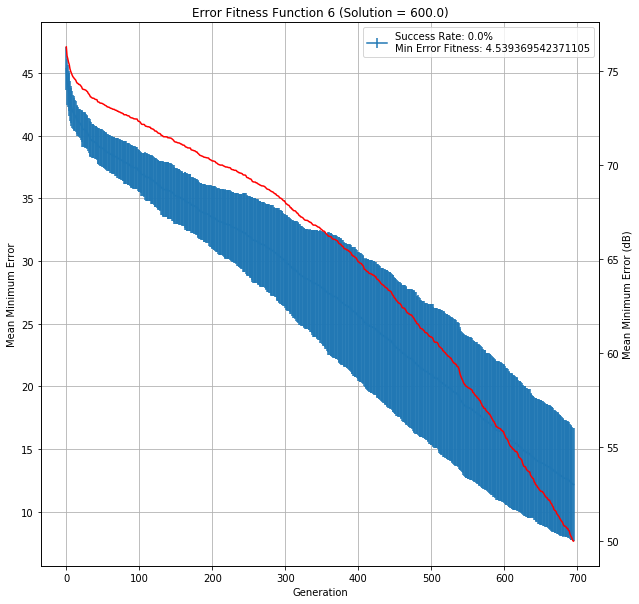

In [10]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10,10))
label = 'Success Rate: {}%\nMin Error Fitness: {}'.format(100*(successRate/float(numRuns)), arr_error.min())
ax.errorbar(np.arange(alg.generations), arr_error.mean(axis=0), yerr=arr_error.std(axis=0), label=label)
ax2 = ax.twinx()
ax2.plot(np.arange(alg.generations), 20*np.log(arr_error.mean(axis=0)), label='Mean Min Error (dB)', color='red')
ax2.set_ylabel('Mean Minimum Error (dB)')

ax.grid(True)
ax.set_ylabel('Mean Minimum Error')
ax.legend()
ax.set_xlabel('Generation')
ax.set_title('Error Fitness Function {} (Solution = {})'.format(funcId, solution))
plt.savefig(output_filepath + 'mean_error_evolution.jpeg', bbox_inches = 'tight')

In [11]:
df_sumup = pd.DataFrame(columns=['algorithm', '#Fc', 'D', 'percFES'] + ['run_' + str(i) for i in np.arange(1,numRuns+1,1)] + ['mean', 'elapsed_time', 'evals'])
df_sumup.loc[df_sumup.shape[0]] = [str(alg), funcId, dim, percMaxEvals] + arr_best_error + [np.mean(arr_best_error), progbar.get_elapsed_time(), alg.fitnessEvals]
print ('Saving df_sumup to ', output_filepath + 'df_sumup.tsv')
df_sumup.to_csv(output_filepath + 'df_sumup.tsv', sep='\t')
df_sumup

Saving df_sumup to 

./results/DE/best/1/bin/[6_30_51_300_0.7_0.5_False_None]df_sumup.tsv

,algorithm,#Fc,D,percFES,run_1,run_2,run_3,run_4,run_5,run_6,...,run_45,run_46,run_47,run_48,run_49,run_50,run_51,mean,elapsed_time,evals
0,DE/best/1/bin,6,30,0.7,18.306182,8.27654,13.041388,5.247056,22.102931,5.922962,...,10.663325,6.958762,12.736667,11.731814,12.415978,14.278265,10.947099,12.165271,15:21:46,209400
